# Graphs in ML - TP2: Face recognition
### Dimitri Bouche (dimitri.bouche@ensae.fr)

In [1]:
import numpy as np
import scipy
import os
import importlib

# Local imports
import funcs_hfs
import helper

# Reload (for developpement)
importlib.reload(funcs_hfs)

# Get working directory path
path = os.getcwd()

## 1. Harmonic Function Solution
***Note:*** the code for the functions is in **funcs_hfs.py**

### Question 1.1: Hard HFS

We first chose $k$ once and for all so as to make sure that the graph is connected

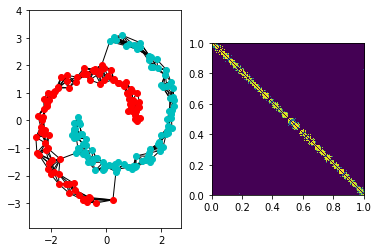

In [2]:
# Make sure empirically that the graph is connected (choice of k)
path = os.getcwd()
in_data =scipy.io.loadmat(path+'/data/data_2moons_hfs')
X = in_data['X']
Y = in_data['Y'][:, 0]

# Params for graph construction
var = 1
eps = 0
k = 7

W = helper.build_similarity_graph(X, var, eps, k)
helper.plot_graph_matrix(X, Y, W)

We then run hard HFS several times (we different random label revelations):

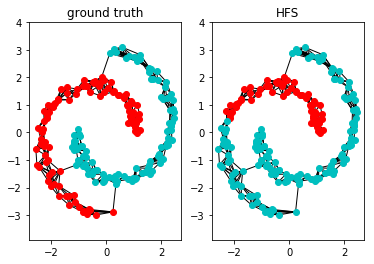

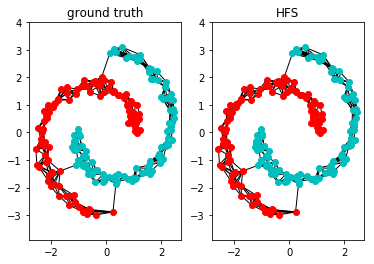

0.815
1.0


In [4]:
# Run hard HFS on the two moons dataset twice
acc1 = funcs_hfs.two_moons_hfs_hard(path, k=k)
acc2 = funcs_hfs.two_moons_hfs_hard(path, k=k)
print(acc1)
print(acc2)

***Comments on the results of hard HFS:***
We reach almost 100 % accuracy provided that we draw 2 labels in each class. If we draw 1 in a class and 3 in the other it gets more difficult and we get more approximative results and a lower accuracy. If we draw 4 labels in the same class then as we could expect, we reach only 50 % accuracy (of course, the whole dataset is predicted to have the label in question).

### Question 1.2

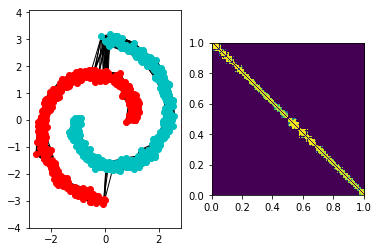

In [5]:
# Make sure empirically that the graph is connected (choice of k)
path = os.getcwd()
in_data =scipy.io.loadmat(path+'/data/data_2moons_hfs_large')
X = in_data['X']
Y = in_data['Y'][:, 0]

# Params for graph construction
var = 1
eps = 0
k = 45

W = helper.build_similarity_graph(X, var, eps, k)
helper.plot_graph_matrix(X, Y, W)

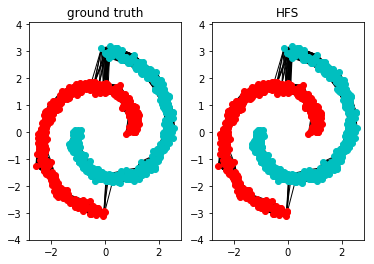

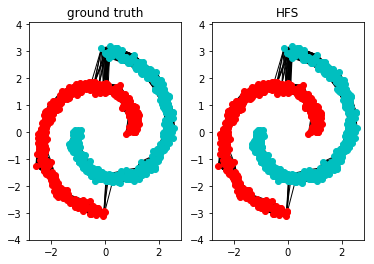

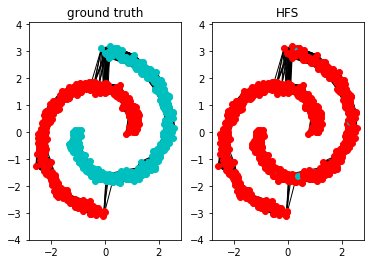

1.0
1.0
0.504


In [18]:
# Run hard HFS on the two moons extended dataset twice
acc1 = funcs_hfs.two_moons_hfs_hard(path, k=k, dataset='/data/data_2moons_hfs_large')
acc2 = funcs_hfs.two_moons_hfs_hard(path, k=k, dataset='/data/data_2moons_hfs_large')
acc3 = funcs_hfs.two_moons_hfs_hard(path, k=k, dataset='/data/data_2moons_hfs_large')
print(acc1)
print(acc2)
print(acc3)

**Question 1.2:**: Looking at the first realization, we have obviously drawn points from both classes (we can see a blue dot among the red dots), however in some cases, we observed that a wrong label contagion can occur along the edges that connect the two moons, which is particularily problematic since we have very few labels revealed, this contagion can go very var. This is the case in the last realisation above, althought we did sampled points from the blue class.

## Question 1.3: Soft HFS

#### Soft HFS on two moons

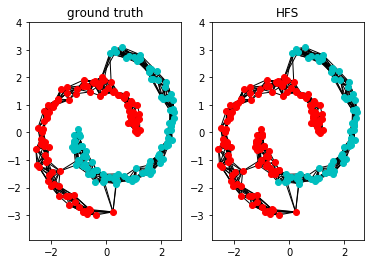

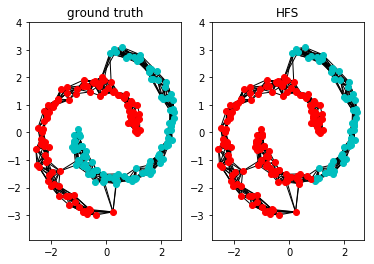

0.855
0.785


In [22]:
k = 10
acc1 = funcs_hfs.two_moons_hfs_soft(path, k=k, cl=1, cu=0.2)
acc2 = funcs_hfs.two_moons_hfs_soft(path, k=k, cl=1, cu=0.2)
print(acc1)
print(acc2)

***Comments on the results for soft HFS:***
The results are not as good as in the hard HFS case. We think it is probably because since here there is no uncertainty on the labels and since we have very few of them, it is not in our best interest to use soft constraints for label matching.

#### Comparison between soft and hard HFS

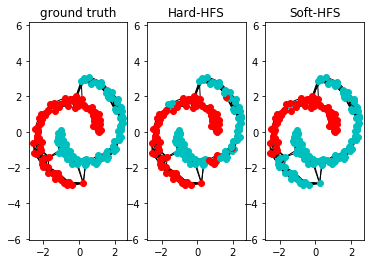

[0.94, 0.89]


In [23]:
accuracy = funcs_hfs.hard_vs_soft_hfs(path, cl=1, cu=0.2)
print(accuracy)

# 2. Face recognition with HFS

***Note:*** the code for the functions is in **funcs_faces_recognition.py**

In [24]:
import matplotlib.pyplot as plt
import scipy.misc as sm
import cv2

# Local imports
import funcs_faces_recognition as faces_recog

# Reload (for developpement)
importlib.reload(faces_recog)

<module 'funcs_faces_recognition' from '/home/dimitribouche/Bureau/MVA/S1/GML/TP2/Code/funcs_faces_recognition.py'>

### Question 2.1
To manage more than two labels, we encoded the label vector as a matrix using the **one hot encoding**. The problem with a binary vector of labels can be adapted to the matrix case without efforts: the solution formula remains the same for the matrix case. We then get a matrix solution for $f_u$. So as to determine the labels from this solution, instead of using positive/negative thresholding (binary case) we take the label of data point $i$ to be the index where the maximum for the $i$-th row of $f_u$ is.

## Small dataset

In [25]:
# Set path
path = os.getcwd()
datapath = path + "/data/"

In [26]:
# Load the dataset and crop the faces
X, Y = faces_recog.load_faces(datapath)

In [27]:
# Apply pre processing function on Xproc and normalize images
Xproc = (1/255) * faces_recog.pre_process(X)
X *= (1/255)

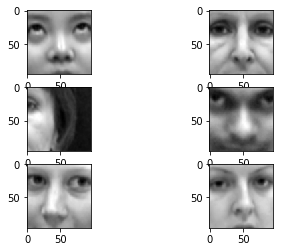

In [28]:
# Plot a few examples from the pre processed dataset
figure, axes = plt.subplots(nrows=3, ncols=2)
axes[0, 0].imshow(Xproc[75, :].reshape(96, 96), cmap="gray")
axes[0, 1].imshow(Xproc[14, :].reshape(96, 96), cmap="gray")
axes[1, 0].imshow(Xproc[19, :].reshape(96, 96), cmap="gray")
axes[1, 1].imshow(Xproc[8, :].reshape(96, 96), cmap="gray")
axes[2, 0].imshow(Xproc[42, :].reshape(96, 96), cmap="gray")
axes[2, 1].imshow(Xproc[66, :].reshape(96, 96), cmap="gray")

***Remark***: here we applied successively a GaussianBlur and we equalized the histograms with equalizeHist. Let us remark that the face detection algorithm it not flawless: we plotted on purpose a case where is does not manage to find the right spot for the face. Thus some labels datapoint may be misleading. This is the case where soft HFS comes handy so as to avoid forcing perfect label matching if labelled datapoints are erroneous.

### Question 2.2
The pre-processing does not seem to have a big impact on the results. We try several combinations of blur, GaussianBlur, histogramm equalization etc... The only step that does matter very much is normalization (multiply by $\frac{1}{255}$) the performance is greatly degraded if it is not applied (althought we think this could be adapted by augmenting the variance parameter in the Gaussian Kernel for the similarity matrix: since the pairwise distance are mechanically very big, when taking the negative exponential, if we do not compensate with a very big variance parameter, we get a similarity matrix with very few information as the coeffient are very close to zero).

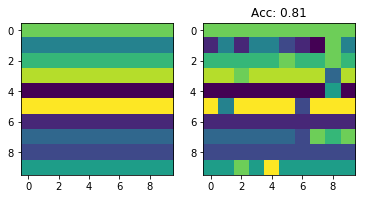

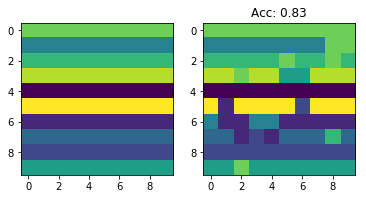

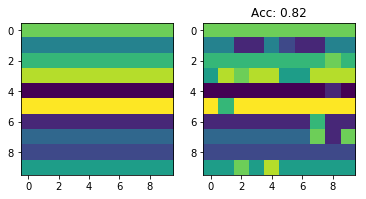

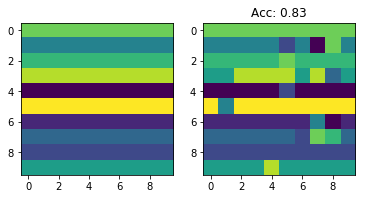

Accuracy on unlabelled data:
0.6833333333333333
0.7166666666666667
0.7
0.7166666666666667


In [36]:
# Perform hard hfs on both original and preprocessed data
acc_unlabelled1 = faces_recog.offline_face_recognition_hard(X, Y, k=10)
acc_unlabelled2 = faces_recog.offline_face_recognition_hard(Xproc, Y, k=10)
acc_unlabelled3 = faces_recog.offline_face_recognition_hard(X, Y, k=10)
acc_unlabelled4 = faces_recog.offline_face_recognition_hard(Xproc, Y, k=10)
print("Accuracy on unlabelled data:")
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)
print(acc_unlabelled4)

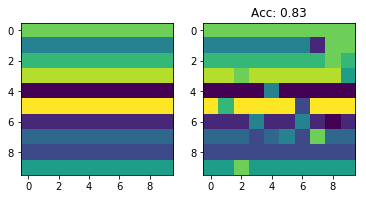

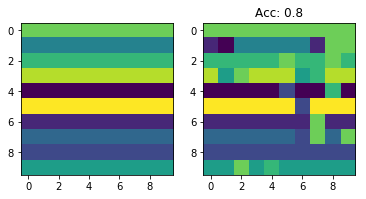

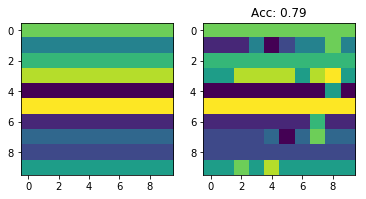

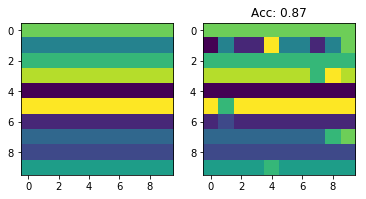

Accuracy on unlabelled data:
0.7166666666666667
0.6666666666666666
0.65
0.7833333333333333


In [38]:
# Perform soft hfs on both original and preprocessed data
acc_unlabelled1 = faces_recog.offline_face_recognition_soft(X, Y, cl=1, cu=1)
acc_unlabelled2 = faces_recog.offline_face_recognition_soft(Xproc, Y, cl=1, cu=1)
acc_unlabelled3 = faces_recog.offline_face_recognition_soft(X, Y, cl=1, cu=1)
acc_unlabelled4 = faces_recog.offline_face_recognition_soft(Xproc, Y, cl=1, cu=1)
print("Accuracy on unlabelled data:")
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)
print(acc_unlabelled4)

### Question 2.3
Looking at the accuracy on unlabelled data, the performance of HFS methods is quite good (since we have ten labels the a random classifier would reach on average an accuracy of 10 % so the problem is more complex than a binary classification and the score has to be interpreted consequently). The results depend very much on the parameters we chose for $c_l$ and $c_u$. However, when we use very soft regularization ($c_l = c_u$) soft HFS seems to perform a bit better (however we would have to average over way more than 4 realizations to reach an acceptable level of certainty for this fact). This would make sense however since as pointed out earlier the face detection algorithm is not flawless, and as a consequence some labelled datapoints may be error inducing.

## Extended dataset

In [39]:
# Load 50 faces for each person from the extended dataset and crop the faces
path = os.getcwd()
datapath = path
nbimgs = 50
X_extended, Y_extended = faces_recog.load_faces_extended(path, nbimgs=nbimgs)
# Normalize dataset
X_extended *= (1/255)

In [40]:
# Merge new data with original dataset
X_extended, Y_extended = faces_recog.merge_datasets(X_extended, X, Y_extended, Y)
order = np.argsort(Y_extended)
X_extended = X_extended[order, :]
Y_extended = Y_extended[order]

In [41]:
# Apply pre processing function on Xproc and normalize images (histogram equalization and gaussian blur)
Xproc_extended = faces_recog.pre_process((255 * X_extended).astype(np.uint8))

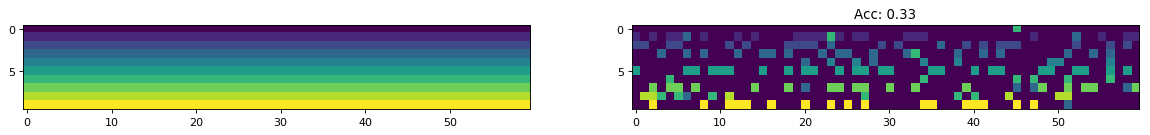

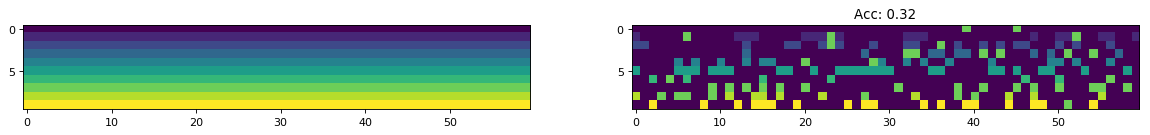

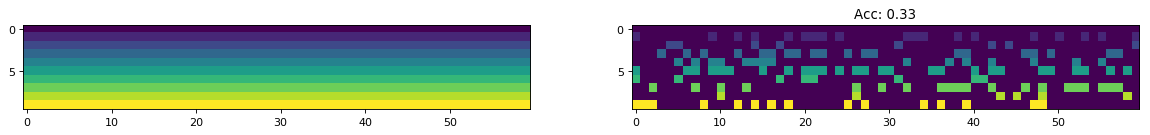

0.28214285714285714
0.2714285714285714
0.28214285714285714


In [42]:
# Perform hard hfs
acc_unlabelled1 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, bigfigure=True)
acc_unlabelled2 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, bigfigure=True)
acc_unlabelled3 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, bigfigure=True)
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)

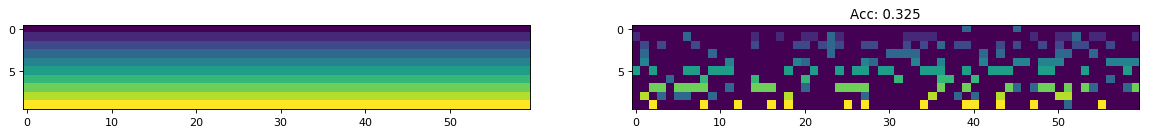

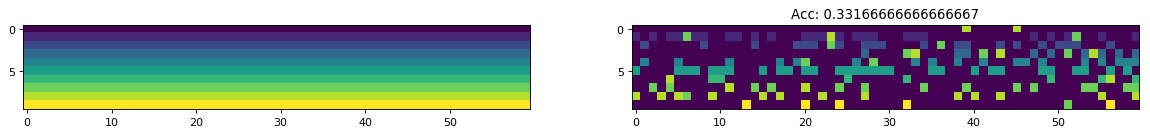

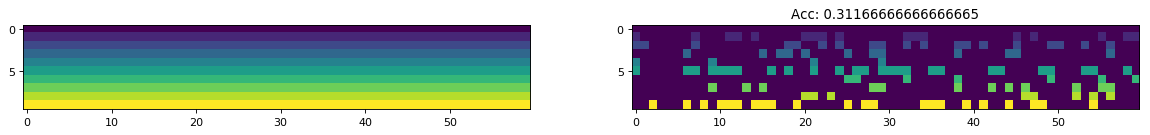

0.2767857142857143
0.2839285714285714
0.2625


In [44]:
# Perform soft hfs
acc_unlabelled1 = faces_recog.offline_face_recognition_soft(Xproc_extended, Y_extended, cu=1, cl=1, k=30, bigfigure=True)
acc_unlabelled2 = faces_recog.offline_face_recognition_soft(Xproc_extended, Y_extended, cu=1, cl=1, k=30, bigfigure=True)
acc_unlabelled3 = faces_recog.offline_face_recognition_soft(Xproc_extended, Y_extended, cu=1, cl=1, k=30, bigfigure=True)
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)

### Question 2.4
Adding data to the task did not improve performance at all. Looking at the accuracy on originally unlabelled data, we are still significantly better that the random classifier but we are nowhere near satisfactory results. 

### Question 2.5
We think that we have simply not enough labels, we kept 4 labels revealed per class but we now have 60 images per class instead of 10. Since HFS relies heavily on label propagation on the graph of similarity, if we have too little information, it is likely that the propagation will become wrong at some point when it is too far from a labelled point. 

Also the notion of similarity we are using is not very adapted to the problem (euclidian distance between flatten vectors only takes into account the intensity of the pixels and not the spatial coherence), moreover there are no real justification for hoping that a face is close in euclidian distance to the same face from a slightly different angle (it is so also for other variations). This is a problem since we are trying to fill the lack of original information (labelled datapoint) by using the information provided by the graph, if the graph is not so reliable we must have more original information so as to perform correctly.

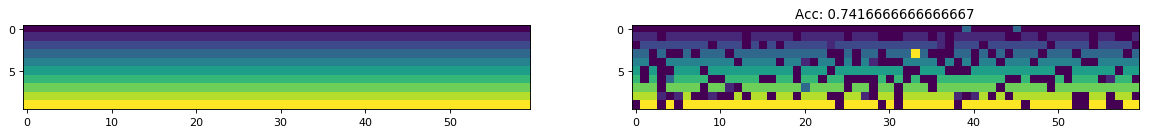

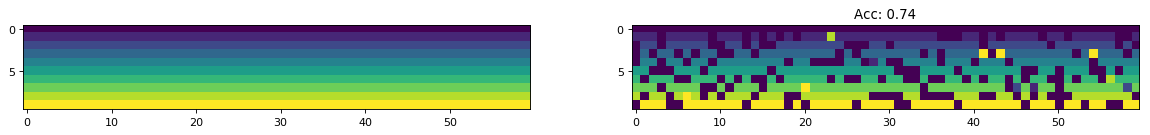

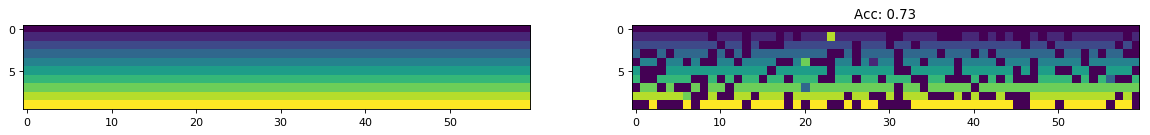

0.5571428571428572
0.5542857142857143
0.5371428571428571


In [45]:
# Perform hard hfs with more labelled data point (l=20)
acc_unlabelled1 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, l=25, bigfigure=True)
acc_unlabelled2 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, l=25, bigfigure=True)
acc_unlabelled3 = faces_recog.offline_face_recognition_hard(Xproc_extended, Y_extended, k=30, l=25, bigfigure=True)
print(acc_unlabelled1)
print(acc_unlabelled2)
print(acc_unlabelled3)